# D212 - Data Mining II Performance Assessment Task 2

Assignment Completed by Favio Conde and Submitted August 14, 2023 for WGU - MSDA
</br>

### Table of Contents

#### Part I: Research Question
<ul>
    <li><a href='#a1'>A1: Proposal of Question</a></li>
    <li><a href='#a2'>A2: Defined Goal</a></li>
</ul>
 
#### Part II: Method Justification
<ul>
    <li><a href='#b1'>B1. Explanation of PCA</a></li>
    <li><a href='#b2'>B2. PCA Assumption</a></li>
</ul> 

#### Part III: Data Preparation
<ul>
    <li><a href='#c1'>C1: Continuous Dataset Variables</a></li>
    <li><a href='#c2'>C2: Standardization of Dataset Variables</a></li>
</ul>

#### Part IV: Analysis
<ul>
    <li><a href='#d1'>D1: Principal Components</a></li>
    <li><a href='#d2'>D2: Identification of Total Number of Components</a></li>
    <li><a href='#d3'>D3: Total Variance of Components</a></li>
    <li><a href='#d4'>D4: Total Variance Captured by Components</a></li>
    <li><a href='#d5'>D5: Summary of Data Analysis</a></li>
</ul>

#### Part V: Attachments
<ul>
    <li><a href='#e'>E. Third-Party Code Reference</a></li>
    <li><a href='#f'>F. Sources</a></li>
</ul>

### PART I: RESEARCH QUESTION

#### A1. Proposal of Question<a id='a1'></a>

Using the continous variables in the dataset, can PCA be used to reduce the variables in the dataset?

#### A2. Defined Goal<a id='a2'></a>

In my analysis, I aim to determine if I can reduce the number of continuous variables to a much smaller number that the hospital can use to analyze and interpret the data more easily.

### PART II: METHOD JUSTIFICATION

#### B1. Explanation of PCA<a id='b1'></a>

Data analysts use Principal Component Analysis to analyze data with many variables.  The process aims to project a dataset with many variables into fewer variables by combining features with high linearity.  PCA uses continuous variables for the analysis.  Collapsing similar variables into fewer variables makes analyzing and visualizing the data easier (Data Camp, 2023).

The first step is to select continuous variables and standardize the data so that each point equally contributes to the variance.  Next, a covariance matrix is created from the standardized data, and eigenvalues are calculated.

A scree plot is created using the eigenvalues, and based on the Kaiser rule, principal components with an eigenvalue greater than 1 are kept.

I expect the PCA process to reduce the number of variables that should be used for analyzing the dataset.

#### B2. PCA Assumption<a id='b2'></a>

The PCA model assumes that there is a linear relationship between the variables.

### PART III: DATA PREPARATION

#### C1. Continuous Dataset Variables<a id='c1'></a>

To perform the PCA analysis, I will be using the following continuous vairales:

<ul>
    <li>Population</li>
    <li>Children</li>
    <li>Age</li>
    <li>Income</li>
    <li>VitD_levels</li>
    <li>Doc_visits</li>
    <li>Full_meals_eaten</li>
    <li>vitD_supp</li>
    <li>Initial_days</li>
    <li>TotalCharge</li>
    <li>Additional_charges</li>
</ul>

The list contains the remaining continuous variables after removing categorical 'numeric' variables like `CaseOrder`, `Zip`, `Lat`, and `Lng` and the survery questions `Item1` through `Item8`.

In [1]:
#importing libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#importing CSV file
df = pd.read_csv('Files/medical_clean.csv')

In [3]:
#checking number of rows and columns in df
df.shape
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 10000 rows and 50 columns


In [4]:
#checking for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
#checking for duplicates
df.duplicated().value_counts()

False    10000
dtype: int64

In [6]:
#dropping all object data type columns
df.drop(df[df.select_dtypes('object').columns], axis=1, inplace=True)

#creating list of columns to drop
drop = ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']

#dropping columns in drop list
df.drop(df[drop], axis=1, inplace=True)

In [7]:
#checking statistical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,10000.0,9965.253800,14824.758614,0.000000,694.750000,2769.000000,13945.000000,122814.000000
Children,10000.0,2.097200,2.163659,0.000000,0.000000,1.000000,3.000000,10.000000
Age,10000.0,53.511700,20.638538,18.000000,36.000000,53.000000,71.000000,89.000000
Income,10000.0,40490.495160,28521.153293,154.080000,19598.775000,33768.420000,54296.402500,207249.100000
VitD_levels,10000.0,17.964262,2.017231,9.806483,16.626439,17.951122,19.347963,26.394449
Doc_visits,10000.0,5.012200,1.045734,1.000000,4.000000,5.000000,6.000000,9.000000
Full_meals_eaten,10000.0,1.001400,1.008117,0.000000,0.000000,1.000000,2.000000,7.000000
vitD_supp,10000.0,0.398900,0.628505,0.000000,0.000000,0.000000,1.000000,5.000000
Initial_days,10000.0,34.455299,26.309341,1.001981,7.896215,35.836244,61.161020,71.981490
TotalCharge,10000.0,5312.172769,2180.393838,1938.312067,3179.374015,5213.952000,7459.699750,9180.728000


#### C2. Standardization of Dataset Variables<a id='c2'></a>

I standardized the data by using the `StandardScaler()` package from `Sklearn` and I exported the updated dataframe into a CSV file.

In [8]:
#standardizing dataset
X = df
scaled_df = pd.DataFrame(StandardScaler().fit_transform(X), columns=df.columns)

In [9]:
#saving standardized data to CSV
scaled_df.to_csv(r'Files/Task 2/medical_standardized.csv', index=False)

### PART IV: ANALYSIS

#### D1. Principal Components<a id='d1'></a>

In [10]:
#using sklearn for the number of PCA
pca = PCA(n_components = scaled_df.shape[1])
pca.fit(scaled_df)

PCA(n_components=11)

In [11]:
#creating PC column names
columns = []

for col in range(1,12):
    columns.append(f'PC{col}')

In [12]:
#transforming scaled_df
pca2 = pd.DataFrame(pca.transform(scaled_df), columns = columns)

In [13]:
#creating maxtrix of all PCs
load = pd.DataFrame(pca.components_.T, columns = columns, index = scaled_df.columns)
load

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Population,0.024451,-0.028354,0.421855,0.370209,-0.235896,0.349305,-0.479600,0.222540,0.475576,0.014389,-0.000930
Children,0.034520,0.017410,-0.096731,0.349000,0.518807,0.626415,0.279715,-0.352459,0.057534,0.003628,-0.000922
Age,0.084872,0.700762,0.023524,-0.017159,0.006689,-0.003294,-0.024529,0.008834,-0.014554,0.706573,0.026245
Income,-0.020184,-0.019046,0.325252,0.196995,0.658378,-0.322788,0.081858,0.554281,-0.055190,0.002259,0.001296
VitD_levels,-0.002039,0.020437,-0.359913,0.572300,-0.328573,0.133583,0.092902,0.414384,-0.486165,-0.002326,-0.001492
Doc_visits,-0.006889,0.015447,0.213144,0.593922,-0.106642,-0.545545,0.072843,-0.535509,0.021685,0.001013,-0.001099
Full_meals_eaten,-0.020703,0.032146,-0.603613,0.129858,0.030406,-0.228783,0.172002,0.184049,0.707448,0.010803,-0.001629
vitD_supp,0.025366,0.014522,0.407015,-0.069521,-0.348283,0.106250,0.799985,0.161924,0.172815,0.000433,-0.000599
Initial_days,0.700222,-0.090235,-0.018411,-0.005489,0.006565,-0.034373,-0.005664,0.009234,-0.004640,0.031468,-0.706275
TotalCharge,0.701358,-0.079643,-0.019610,-0.002230,0.004801,-0.033307,-0.005328,0.009057,-0.002110,-0.031443,0.706490


#### D2. Identification of Total Number of Components<a id='d2'></a>

Based on the Kaiser Rule and the use of a scree plot, PC1, PC2, PC3 and PC4 should be kept since they have an eigenvalue greater than 1.

In [14]:
#creating covariance matrix
cov_matrix = np.dot(scaled_df.T, scaled_df / scaled_df.shape[0] )
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

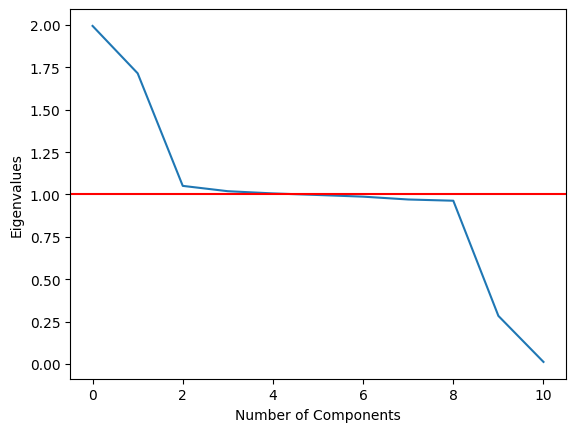

In [15]:
#creating scree plot
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y = 1, color = 'red')
plt.show()

#### D3. Total Variance of Components<a id='d3'></a>

In [16]:
#creating variable to capture total variance by PC
pca_var = pca.explained_variance_ratio_*100

In [17]:
#creating table to showcase variance by PC
df_pca_var = pd.DataFrame({'Total PC Variance': pca_var.round(2)}, index=columns)
df_pca_var

,Total PC Variance
PC1,18.14
PC2,15.59
PC3,9.55
PC4,9.27
PC5,9.15
PC6,9.06
PC7,8.97
PC8,8.82
PC9,8.76
PC10,2.58


#### D4. Total Variance Captured by Components<a id='d4'></a>

In [18]:
#showing only PCs identified in D2: PC1, PC2, PC3, PC4 and PC5
df_pca_var.iloc[0:5]

,Total PC Variance
PC1,18.14
PC2,15.59
PC3,9.55
PC4,9.27
PC5,9.15


In [19]:
#summing variance captured by D4
print(f'Sum of the variance captured by PC1, PC2, PC3, PC4 and PC5 is {df_pca_var.iloc[0:5]["Total PC Variance"].sum().round(2)}%')

Sum of the variance captured by PC1, PC2, PC3, PC4 and PC5 is 61.7%


#### D5. Summary of Data Analysis<a id='d5'></a>

For the PCA analysis, I used `PCA` from `Sklearn` to set the number of PCA components and create a matrix using all the PCs, which I standardized in C2.

In D2, I calculated and plotted the eigenvalues to apply the Kaiser rule to reduce the number of PCs in my analysis.  The Kaiser rule states that you should keep PCs with an eigenvalue greater than 1.  As a result of this step, I ended up with 5 PCs.

In D3, I summed all of the variance across all 11 PCs, which totaled 100%.

In D4, we can see that PC1, PC2, PC3, PC4 and PC5 captures 62.7% of the total variance in the dataset.

### PART V: ATTACHMENTS

#### E. Third-Party Code References<a id='e'></a>

Middleton, Dr. Keiona (2022). <i>D206 - Webinar 4: Getting Started with PCA - November (2022)</i> [Webinar].
    </br>&emsp;&emsp;Western Governors University. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=7b31791b-24e8-4077-ba1a-af5d0005144c
    
Scikit-learn (n.d.).  <i>sklearn.decomposition.PCA</i>. Scikit-learn.
    </br>&emsp;&emsp;Retrieved August 14, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    
Scikit-learn (n.d.).  <i>sklearn.preprocessing.StandardScaler</i>. Scikit-learn.
    </br>&emsp;&emsp;Retrieved August 14, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

#### F. Sources<a id='f'></a>

Data Camp (2023, February).  <i>Principal Component Analysis in R Tutorial</i>.  Data Camp.
    </br>&emsp;&emsp;Retrieved August 14, 2023, from https://www.datacamp.com/tutorial/pca-analysis-r

Great Learning Team (2022, November 21).  <i>Understanding Principal Component Analysis and their Applications</i>.  Great Learning.
    </br>&emsp;&emsp;Retrieved August 14, 2023, from https://www.datacamp.com/tutorial/pca-analysis-r